# FSL course - BET

This interactive demonstration is based on the official FSL course **"Introductory FSL Practicals/ Introduction - BET"**.

Brain extraction is a fundamental preprocessing step in neuroimaging analysis, particularly critical for structural image segmentation where precision matters most. While BET is straightforward to use, achieving optimal results often requires understanding how to fine-tune parameters for challenging datasets.
This interactive version covers the core BET fundamentals, including parameter adjustment techniques for difficult images, and troubleshooting approaches for problematic cases. The hands-on format allows you to experiment with different settings and immediately see their effects on brain extraction quality.

**Author:** Monika Doerig

**Date:** 13 June 2025

### Citation/ Resources:
#### Tools included in this workflow
__FSL - Brain Extraction Tool (BET)__
- M. Jenkinson, C.F. Beckmann, T.E. Behrens, M.W. Woolrich, S.M. Smith. FSL. [NeuroImage, 62:782-90, 2012](https://www.sciencedirect.com/science/article/abs/pii/S1053811911010603?via%3Dihub)

- Smith S. M. (2002). Fast robust automated brain extraction. Human brain mapping, 17(3), 143–155. [https://doi.org/10.1002/hbm.10062](https://doi.org/10.1002/hbm.10062)

#### Dataset
- [FSL course online materials](https://open.win.ox.ac.uk/pages/fslcourse/website/online_materials.html)
  
#### Educational resources
- [FSL course practicals BET](https://open.win.ox.ac.uk/pages/fslcourse/practicals/intro2/index.html)
- [FSL Wiki BET](https://fsl.fmrib.ox.ac.uk/fsl/docs/structural/bet.html)


## Load FSL

In [1]:
import module
await module.load('fsl/6.0.7.16') # specific version
await module.list()

['fsl/6.0.7.16']

## Download course material

In [2]:
! wget -c -nc https://fsl.fmrib.ox.ac.uk/fslcourse/downloads/preCourse.tar.gz
! tar -xzvf preCourse.tar.gz --skip-old-files

--2025-10-30 00:58:14--  https://fsl.fmrib.ox.ac.uk/fslcourse/downloads/preCourse.tar.gz
Resolving fsl.fmrib.ox.ac.uk (fsl.fmrib.ox.ac.uk)... 129.67.248.66
Connecting to fsl.fmrib.ox.ac.uk (fsl.fmrib.ox.ac.uk)|129.67.248.66|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 239640893 (229M) [application/x-gzip]
Saving to: ‘preCourse.tar.gz’

preCourse.tar.gz    100%[===================>] 228.54M  82.4MB/s    in 2.8s    

2025-10-30 00:58:17 (82.4 MB/s) - ‘preCourse.tar.gz’ saved [239640893/239640893]

fsl_course_data/intro/
fsl_course_data/intro/highres.nii.gz
fsl_course_data/intro/bighead.nii.gz
fsl_course_data/intro/filtered_func_data.nii.gz
fsl_course_data/intro/example_func.nii.gz
fsl_course_data/intro/structural.nii.gz
fsl_course_data/intro/egfmri.nii.gz
fsl_course_data/intro/example_func2highres.mat
fsl_course_data/intro/diffdata.nii.gz
fsl_course_data/intro/image0.nii.gz
fsl_course_data/intro/egepi.nii.gz
fsl_course_data/intro/standard.nii.gz
fsl_course_da

## BET basics
BET performs brain extraction by removing non-brain tissue from structural MRI images:

`bet <input> <output> [options]`

- Input: Structural image (e.g., structural.nii.gz)
- Output: Brain-extracted image
- Options: Additional outputs like binary mask or skull surface (optional)

For detailed instructions, see the complete FSL tutorial and the help page.

In [3]:
!bet


Usage:    bet <input> <output> [options]

Main bet2 options:
  -o          generate brain surface outline overlaid onto original image
  -m          generate binary brain mask
  -s          generate approximate skull image
  -n          don't generate segmented brain image output
  -f <f>      fractional intensity threshold (0->1); default=0.5; smaller values give larger brain outline estimates
  -g <g>      vertical gradient in fractional intensity threshold (-1->1); default=0; positive values give larger brain outline at bottom, smaller at top
  -r <r>      head radius (mm not voxels); initial surface sphere is set to half of this
  -c <x y z>  centre-of-gravity (voxels not mm) of initial mesh surface.
  -t          apply thresholding to segmented brain image and mask
  -e          generates brain surface as mesh in .vtk format

Variations on default bet2 functionality (mutually exclusive options):
  (default)   just run bet2
  -R          robust brain centre estimation (iterates BE

In [7]:
# Create directory (won't error if it exists)
! mkdir -p ./output

In [8]:
! bet ./fsl_course_data/intro/structural.nii.gz ./output/structural_brain -m -s

In [9]:
! ls output -lrt

total 3620
-rw-r--r-- 1 jovyan users 3516911 Oct 30 01:04 structural_brain.nii.gz
-rw-r--r-- 1 jovyan users   73650 Oct 30 01:04 structural_brain_mask.nii.gz
-rw-r--r-- 1 jovyan users  114340 Oct 30 01:04 structural_brain_skull.nii.gz


### Visualization with ipyniivue

In [10]:
from ipyniivue import NiiVue

nv = NiiVue()
nv.load_volumes( [{"path": "./fsl_course_data/intro/structural.nii.gz", "colormap": "gray"},
                {"path": "./output/structural_brain.nii.gz", "colormap": "red" },
                 {"path": "./output/structural_brain_skull.nii.gz", "colormap": "blue" }])
nv

NiiVue(clip_plane_depth_azi_elev=[2.0, 0.0, 0.0], draw_lut=None, graph=<ipyniivue.traits.Graph object at 0x7ff…

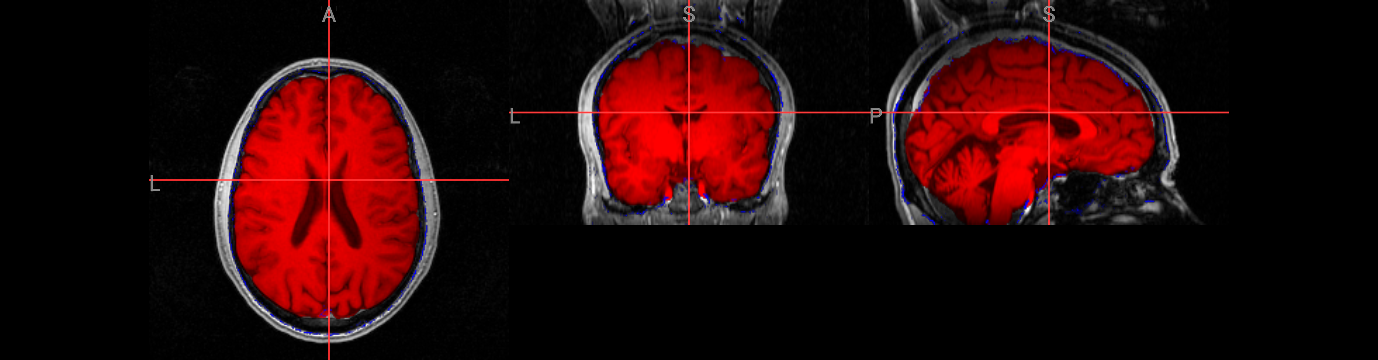

In [1]:
from IPython.display import Image
Image(filename='../../static/examples/structural_imaging/FSL_course_bet/fsl_course_bet05.png')

### Varying the fractional intensity threshold parameter (-f)
The fractional intensity threshold is BET's key parameter for distinguishing brain tissue from non-brain tissue. This interactive demonstration shows how different `-f` values affect brain extraction results:

- Lower values (e.g., -f 0.2): More inclusive extraction - captures more tissue but may include non-brain areas
- Higher values (e.g., -f 0.8): More conservative extraction - tighter brain boundary but may exclude brain tissue
- Default (-f 0.5): Balanced approach suitable for most cases

The folowing visualization shows three different threshold results overlaid on the original image, demonstrating how this single parameter dramatically changes the extraction outcome.

In [12]:
! bet ./fsl_course_data/intro/structural.nii.gz ./output/structural_brain_f02 -m -s -f 0.2
! bet ./fsl_course_data/intro/structural.nii.gz ./output/structural_brain_f08 -m -s -f 0.8

In [13]:
nv = NiiVue()
nv.load_volumes( [{"path": "./output/structural_brain_f02.nii.gz", "colormap": "gray"},
                 {"path": "./output/structural_brain.nii.gz", "colormap": "green"}, 
                  {"path": "./output/structural_brain_f08.nii.gz", "colormap": "red"}])
nv

NiiVue(clip_plane_depth_azi_elev=[2.0, 0.0, 0.0], draw_lut=None, graph=<ipyniivue.traits.Graph object at 0x7ff…

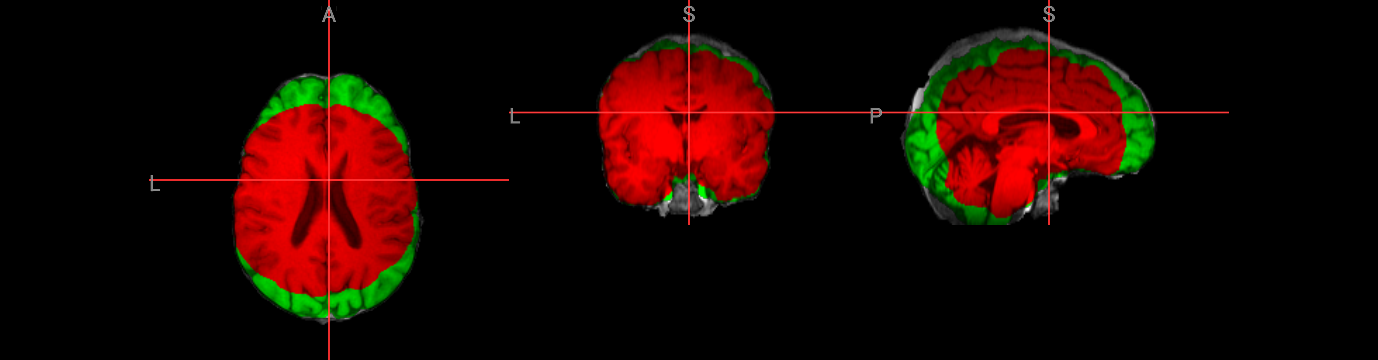

In [2]:
Image(filename='../../static/examples/structural_imaging/FSL_course_bet/fsl_course_bet_f.png')

## Troubleshooting Brain Extraction

### Cerebellum Underestimation: Using the gradient threshold option (-g)

- **Problem:** Lower brain regions (cerebellum) get cut off


In [15]:
! bet ./fsl_course_data/intro/sub3m0.nii.gz ./output/sub3m0_brain

In [16]:
nv = NiiVue()
nv.load_volumes( [{"path": "./output/sub3m0_brain.nii.gz"}])
nv

NiiVue(clip_plane_depth_azi_elev=[2.0, 0.0, 0.0], draw_lut=None, graph=<ipyniivue.traits.Graph object at 0x7ff…

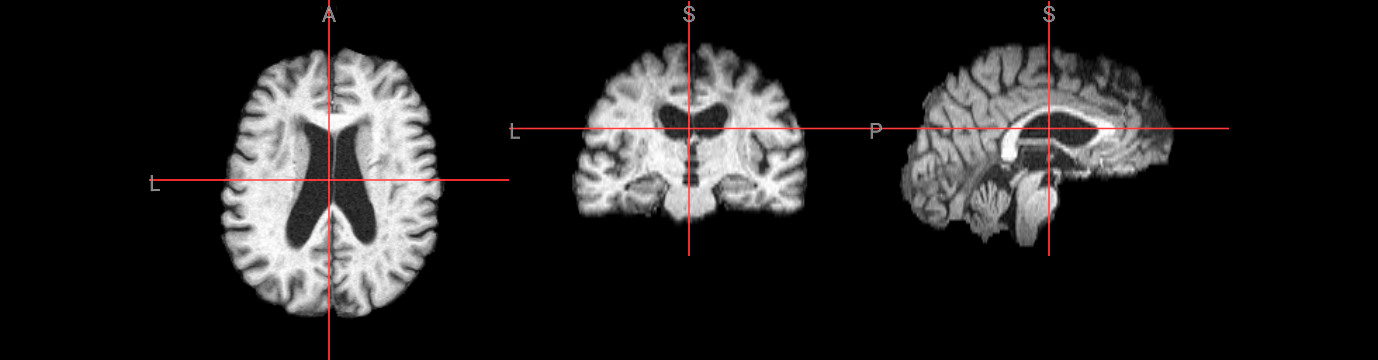

In [3]:
Image(filename='../../static/examples/structural_imaging/FSL_course_bet/fsl_course_bet_sub3m0.png')

- **Solution:** Use gradient threshold (-g) to vary the intensity threshold linearly by slice (getting smaller at the bottom and bigger at the top, or vice versa)
- **Example:** Try -f 0.3 -g 0.2 for balanced results

In [18]:
! bet ./fsl_course_data/intro/sub3m0.nii.gz ./output/sub3m0_f03g02 -f 0.3 -g 0.2

In [19]:
nv = NiiVue()
nv.load_volumes([{"path": "./output/sub3m0_f03g02.nii.gz", "colormap": "gray"},
                 {"path": "./output/sub3m0_brain.nii.gz", "colormap": "green"}])
nv

NiiVue(clip_plane_depth_azi_elev=[2.0, 0.0, 0.0], draw_lut=None, graph=<ipyniivue.traits.Graph object at 0x7ff…

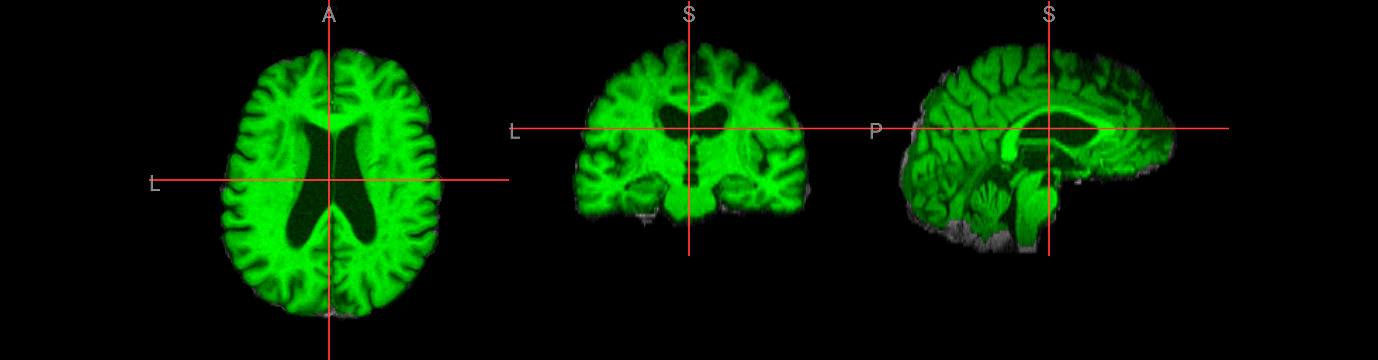

In [4]:
Image(filename='../../static/examples/structural_imaging/FSL_course_bet/fsl_course_bet_sub3m0_g.png')

### Dealing with large FOV images

- **Problem:** Large amount of neck/extra tissue confuses brain detection (initial brain surface is initialised too low):

In [21]:
! bet ./fsl_course_data/intro/bighead.nii.gz ./output/bighead_brain

In [22]:
nv = NiiVue()
nv.load_volumes( [{"path": "./fsl_course_data/intro/bighead.nii.gz", "colormap": "gray"},
                  {"path": "./output/bighead_brain.nii.gz", "colormap": "red"}])

nv

NiiVue(clip_plane_depth_azi_elev=[2.0, 0.0, 0.0], draw_lut=None, graph=<ipyniivue.traits.Graph object at 0x7ff…

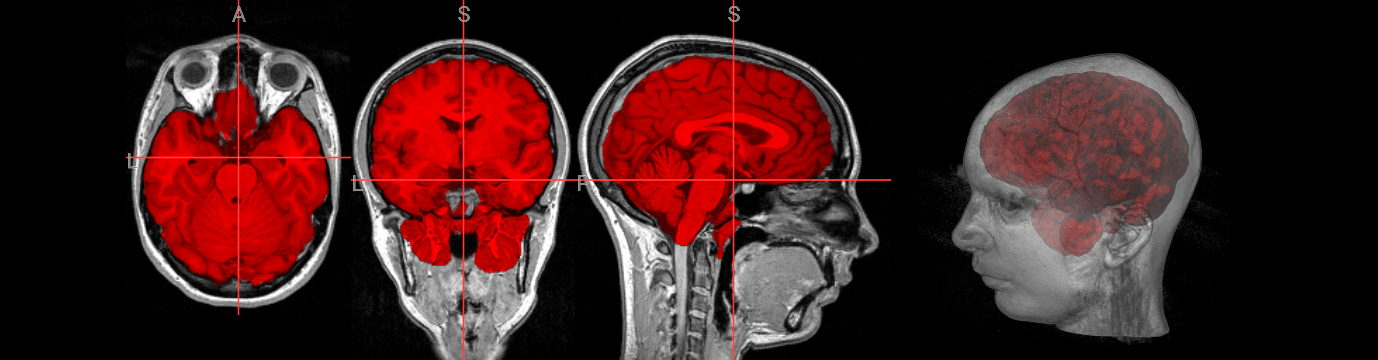

In [5]:
Image(filename='../../static/examples/structural_imaging/FSL_course_bet/fsl_course_bet_bighead.png')

- **Solutions:**

- Crop the image first to remove the neck: `robustfov -i input -r output_crop` (recommended)
- Leave large FOV, but set brain centre-of-gravity: `-c <x y z> option`  (manual coordinate specification)
- Robust brain centre estimation: `-R   option` (iterates BET several times)

Different images may need different approaches - having multiple strategies available is essential for handling problematic cases.

**Recommended Practice**: Combine cropping with `-R` option for most robust results across different image types:

In [24]:
# crop the image
!robustfov -i ./fsl_course_data/intro/bighead.nii.gz -r ./output/bighead_crop

Final FOV is: 
0.000000 160.000000 0.000000 224.000000 61.000000 170.000000 



In [25]:
nv = NiiVue()
nv.load_volumes( [{"path": "./fsl_course_data/intro/bighead.nii.gz", "colormap": "gray", "opacity": 1.0},
                  {"path": "./output/bighead_crop.nii.gz", "colormap": "blue", "opacity": 1.0}])

nv

NiiVue(clip_plane_depth_azi_elev=[2.0, 0.0, 0.0], draw_lut=None, graph=<ipyniivue.traits.Graph object at 0x7ff…

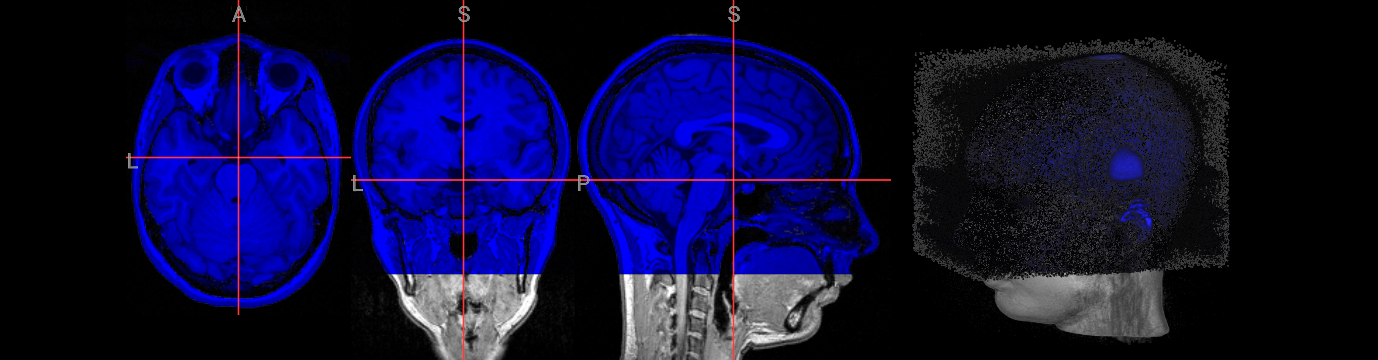

In [6]:
Image(filename='../../static/examples/structural_imaging/FSL_course_bet/fsl_course_bet_bighead_crop.png')

In [27]:
! bet ./output/bighead_crop.nii.gz ./output/bighead_crop_brain -R

In [28]:
nv = NiiVue()
nv.load_volumes( [{"path": "./output/bighead_brain.nii.gz", "colormap": "gray"},
                  {"path": "./output/bighead_crop_brain.nii.gz", "colormap": "red"}])

nv

NiiVue(clip_plane_depth_azi_elev=[2.0, 0.0, 0.0], draw_lut=None, graph=<ipyniivue.traits.Graph object at 0x7ff…

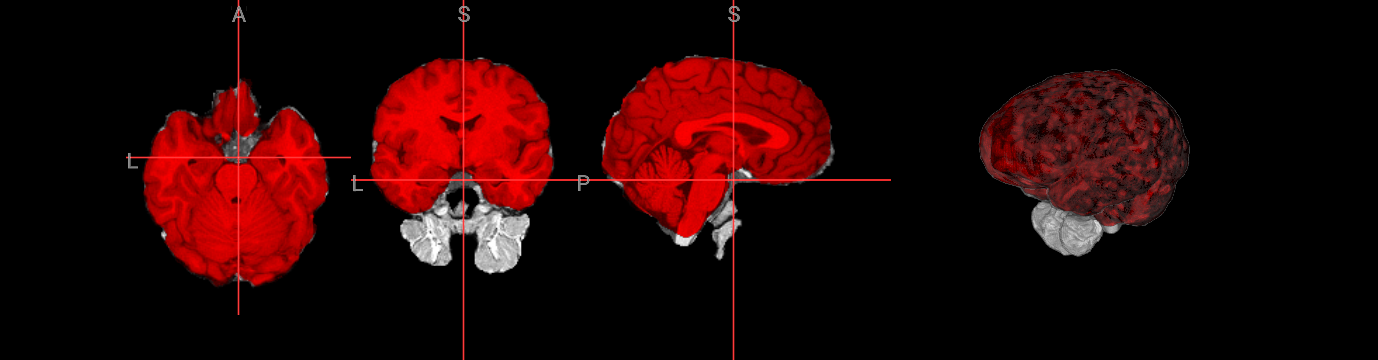

In [7]:
Image(filename='../../static/examples/structural_imaging/FSL_course_bet/fsl_course_bet_bighead_crop_brain.png')

#### Dependencies in Jupyter/Python
- Using the package [watermark](https://github.com/rasbt/watermark) to document system environment and software versions used in this notebook

In [30]:
%load_ext watermark

%watermark
%watermark --iversions

Last updated: 2025-10-30T01:05:11.538945+00:00

Python implementation: CPython
Python version       : 3.11.6
IPython version      : 8.16.1

Compiler    : GCC 12.3.0
OS          : Linux
Release     : 5.4.0-204-generic
Machine     : x86_64
Processor   : x86_64
CPU cores   : 32
Architecture: 64bit

IPython  : 8.16.1
ipyniivue: 2.3.2

